In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# pip install tensorflow_addons

In [3]:
import os
os.chdir("d:\\OneDrive_VT\\OneDrive - Virginia Tech\\Research\\Codes\\research\\PigBW\\Pig_BW_beta\\DL\\Vit")
os.getcwd()

'd:\\OneDrive_VT\\OneDrive - Virginia Tech\\Research\\Codes\\research\\PigBW\\Pig_BW_beta\\DL\\Vit'

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd


d:\miniconda\envs\DL4Met\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\miniconda\envs\DL4Met\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [75]:
## Read into labelled depth iamges
## label process is in SimpleCNN.ipynb
labelled_depth = pd.read_csv("../labelled_depth.csv")
pens = np.unique(labelled_depth["Pen"])


In [76]:
labelled_depth = labelled_depth[labelled_depth["Pen"]=="pen1top"]

In [77]:
labelled_depth

,FilePath,Pen,Bag_ID,Weights
19648,H:/0801/pen1top/Depth_resize/20230801_135940/_...,pen1top,20230801_135940,88.904
19649,H:/0801/pen1top/Depth_resize/20230801_135940/_...,pen1top,20230801_135940,88.904
19650,H:/0801/pen1top/Depth_resize/20230801_135940/_...,pen1top,20230801_135940,88.904
19651,H:/0801/pen1top/Depth_resize/20230801_135940/_...,pen1top,20230801_135940,88.904
19652,H:/0801/pen1top/Depth_resize/20230801_135940/_...,pen1top,20230801_135940,88.904
...,...,...,...,...
22216,H:/0801/pen1top/Depth_resize/20230801_142112/_...,pen1top,20230801_142112,72.575
22217,H:/0801/pen1top/Depth_resize/20230801_142112/_...,pen1top,20230801_142112,72.575
22218,H:/0801/pen1top/Depth_resize/20230801_142112/_...,pen1top,20230801_142112,72.575
22219,H:/0801/pen1top/Depth_resize/20230801_142112/_...,pen1top,20230801_142112,72.575


In [78]:

# Set the path to your image folder
# List all files
def read_images(labelled_depth):
    images = []
    for filename in labelled_depth["FilePath"]:
        if filename.endswith('.png'):  # Check the file format
            img_path = filename
            img = Image.open(img_path).convert('L')  # 'L' mode means grayscale
            images.append(img)

    # Convert images to array and resize
    image_size = 224
    processed_images = np.array([img_to_array(img.resize((image_size, image_size))) for img in images])

    # Normalize the image data
    processed_images = processed_images / 255.0
    return processed_images


In [79]:
pig_n = np.unique(labelled_depth['Bag_ID']).shape[0]

In [80]:
import random
train_bag_id = random.sample(list(np.unique(labelled_depth["Bag_ID"])), int(pig_n*0.8))

train_df = labelled_depth[labelled_depth["Bag_ID"].isin(train_bag_id)]
test_df = labelled_depth[-labelled_depth["Bag_ID"].isin(train_bag_id)]

In [8]:
# Convert weight array to a NumPy array
# weights = [np.random.randint(0, 100) for i in range(processed_images.shape[0])] #要改成实际输入的weight

# # Split the dataset
# x_train, x_test, y_train, y_test = train_test_split(processed_images, weights, test_size=0.2, random_state=42)
# y_train = y_train.astype(np.float32)
# y_test = y_test.astype(np.float32)


In [81]:
train_df.shape

(2030, 4)

In [82]:
x_train = read_images(labelled_depth=train_df)
print(x_train.shape)
y_train = train_df["Weights"].values
y_train = y_train.astype(np.float32)
print(y_train.shape)


(2030, 224, 224, 1)
(2030,)


In [83]:
x_test = read_images(labelled_depth=test_df)
print(x_test.shape)
y_test = test_df["Weights"].values
y_test = y_test.astype(np.float32)
print(y_test.shape)

(543, 224, 224, 1)
(543,)


In [ ]:
# train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale =1./255,
#     validation_split = 0.2
# )
# test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale = 1./255
# )

In [ ]:
# train_images = train_generator.flow_from_dataframe(
#     dataframe=train_df,
#     x_col='FilePath',
#     y_col='Weights',
#     target_size=(224,224),
#     color_mode='rgb',
#     class_mode='raw',
#     batch_size=4,
#     shuffle=True,
#     seed=42,
#     subset='training',
# )

# val_images = train_generator.flow_from_dataframe(
#     dataframe=train_df,
#     x_col='FilePath',
#     y_col='Weights',
#     target_size=(224,224),
#     color_mode='rgb',
#     class_mode='raw',
#     batch_size=4,
#     shuffle=True,
#     seed=42,
#     subset='validation',
# )

# test_images = test_generator.flow_from_dataframe(
#     dataframe=test_df,
#     x_col='FilePath',
#     y_col='Weights',
#     target_size=(224,224),
#     color_mode='rgb',
#     class_mode='raw',
#     batch_size=4,
#     shuffle=False,
# )

In [84]:
num_classes = 1
input_shape = (224, 224, 1)

In [85]:
# Configure hyperparameters
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 4
num_epochs = 10
patience = 5
image_size = 224
patch_size = 5
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]
transformer_layers = 8
mlp_head_units = [2048, 1024]


In [86]:

# Data augmentation
# Uncomment and modify the following lines if data augmentation is needed

# Multilayer Perceptron (MLP)
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Layer to extract image patches
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# Define Patch Encoding layer
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# Create ViT Regressor model
def create_vit_regressor():
    inputs = layers.Input(shape=input_shape)
    augmented = inputs
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    output = layers.Dense(1, activation='linear')(features)  # Linear activation function in output layer

    model = keras.Model(inputs=inputs, outputs=output)
    print(model.summary())
    return model

# Define Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define Mean Absolute Error metric
def mean_absolute_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Run regression experiment
# Define Mean Squared Error loss function
def mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define Mean Absolute Error metric
def mean_absolute_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Run regression experiment
def run_regression_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=mean_squared_error,
        metrics=[mean_absolute_error]
    )

    checkpoint_filepath = "../tmp/checkpoint/"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
        patience=patience
    )

    hist = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )
    # Plot the training curve
    # plt.plot(hist.history['loss'])
    # plt.plot(hist.history['val_loss'])
    # plt.title('Model loss')
    # plt.ylabel('Loss')
    # plt.xlabel('Epoch')
    # plt.legend(['train', 'val'], loc='upper right')
    # plt.show()
    # plt.plot(hist.history['accuracy'])
    # plt.plot(hist.history['val_accuracy'])
    # plt.title('Model accuracy')
    # plt.ylabel('Accuracy')
    # plt.xlabel('Epoch')
    # plt.legend(['train', 'val'], loc='lower right')
    # plt.show()
    model.load_weights(checkpoint_filepath)
    test_loss, test_mae = model.evaluate(x_test, y_test)
    print(f"Test loss: {test_loss}")
    print(f"Test MAE: {test_mae}")

    return hist



In [87]:
# Create and run regression experiment with ViT regressor
vit_regressor = create_vit_regressor()
hist = run_regression_experiment(vit_regressor)

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 patches_5 (Patches)            (None, None, 25)     0           ['input_6[0][0]']                
                                                                                                  
 patch_encoder_5 (PatchEncoder)  (None, 1936, 64)    125568      ['patches_5[0][0]']              
                                                                                                  
 layer_normalization_85 (LayerN  (None, 1936, 64)    128         ['patch_encoder_5[0][0]']  

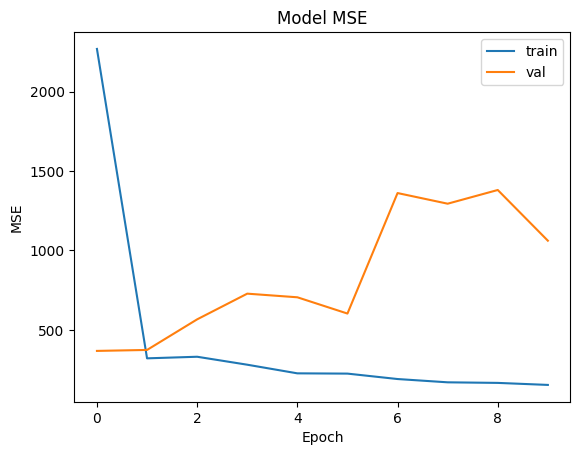

In [88]:
# Plot the training curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()


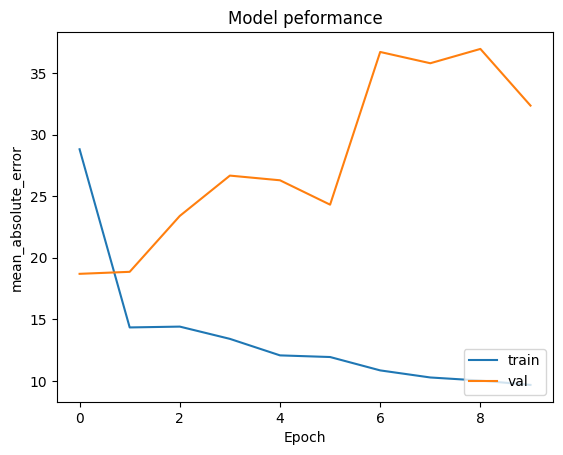

In [89]:
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('Model peformance')
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [90]:
test_loss, test_mae = vit_regressor.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test MAE: {test_mae}")

17/17 [==============================] - 8s 470ms/step - loss: 712.5118 - mean_absolute_error: 25.5521
Test loss: 712.5117797851562
Test MAE: 25.552059173583984


In [91]:
predicted_weights = np.squeeze(vit_regressor.predict(x_test))
true_weights = y_test

17/17 [==============================] - 9s 455ms/step


In [92]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [93]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
print('METRICS ON ENTIRE DATASET:')
print('--------------------------')
# rmse = np.sqrt(cnn.evaluate(test_images, verbose=0))
rmse = mean_squared_error(true_weights, predicted_weights)**0.5
print("Test RMSE:\t{:.5f}".format(rmse))
r2 = r2_score(true_weights,predicted_weights)
print("Test R^2 Score:\t{:.5f}".format(r2))
MAPE = mape(true_weights, predicted_weights)
print("Test MAPE:\t{:.5f}%".format(MAPE))
print('--------------------------')

METRICS ON ENTIRE DATASET:
--------------------------
Test RMSE:	26.69292
Test R^2 Score:	-10.52018
Test MAPE:	29.09396%
--------------------------
